Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

def readcsv(filename):
	with open(filename,"rb") as f:
		reader = unicodecsv.DictReader(f);
		return list(reader);

enrollments = readcsv('enrollments.csv');    
daily_engagement = readcsv('daily_engagement.csv');
project_submissions = readcsv('project_submissions.csv');

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
print enrollments[0]
enrollments[0]
print enrollments[0]['account_key'];
enrollments[0]

import pandas
data = pandas.DataFrame(enrollments)
print data

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
448
     account_key cancel_date days_to_cancel is_canceled is_udacity  \
0            448  2015-01-14             65        True       True   
1            448  2014-11-10              5        True       True   
2            448  2015-01-27              0        True       True   
3            448  2014-11-10              0        True       True   
4            448                                  False       True   
5            448  2015-01-27             13        True       True   
6            448  2015-03-10             42        True       True   
7            448  2015-01-27              0        True       True   
8            448  2015-01-27              0        True       True   
9            700  2014-11-16              6        True      False   
10           429  2015-03-10            12

## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
print len(enrollments)

unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
print len(unique_enrolled_students)

print len(daily_engagement)

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['account_key'])
print len(unique_engagement_students)

print len(project_submissions)

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
print len(unique_project_submitters)

print daily_engagement[0]['account_key']
tot = 0
for each in enrollments:
    if ((each['account_key'] not in unique_engagement_students) & ((each['days_to_cancel'] > 0) | (each['days_to_cancel'] is None)))        :
        print each
        tot+=1
        print tot;
print tot        
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break
        
print tot


1640
1302
136240
1237
3642
743
0
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
1
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
2
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3
3
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
3


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for each in non_udacity_enrollments:
    if(each['days_to_cancel'] > 7 or each['days_to_cancel'] is None):
        if(not each['account_key'] in paid_students):
            paid_students[each['account_key']] = each['join_date']
        if(each['join_date'] > paid_students[each['account_key']] ):
            paid_students[each['account_key']] = each['join_date']
        
print len(paid_students)


995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

## Exploring Student Engagement

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data,key_name):
    engagement_by_account = defaultdict(list)
    for engagement_record in data:
        key = engagement_record[key_name]
        engagement_by_account[key].append(engagement_record)
    return engagement_by_account
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_group_data(data,key):
    total_minutes_by_account = {}
    for account_key, engagement_for_student in data.items():
        total_minutes = 0
        for engagement_record in engagement_for_student:
            total_minutes += engagement_record[key]
        total_minutes_by_account[account_key] = total_minutes
    return total_minutes_by_account

total_minutes_by_account = sum_group_data(engagement_by_account,'total_minutes_visited')
lessons_completed_by_account = sum_group_data(engagement_by_account, 'lessons_completed')
print len(total_minutes_by_account)
print len(lessons_completed_by_account)

995
995


In [18]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def print_statistics(data):
    total_minutes = data.values()
    print 'Mean:', np.mean(total_minutes)
    print 'Standard deviation:', np.std(total_minutes)
    print 'Minimum:', np.min(total_minutes)
    print 'Maximum:', np.max(total_minutes)
    
print_statistics(total_minutes_by_account)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################
account_with_problems = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    if(total_minutes > 10080):
        account_with_problems[account_key] = engagement_by_account[account_key]
        
print len(account_with_problems)
for account_key, engagement_for_student in account_with_problems.items():
    for engagement_record in engagement_for_student:
        print engagement_record
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

0


## Lessons Completed in First Week

In [20]:
#####################################
#                 9                 #
#####################################
"""lessons_completed = lessons_completed_by_account.values()
print 'Mean:', np.mean(lessons_completed)
print 'Standard deviation:', np.std(lessons_completed)
print 'Minimum:', np.min(lessons_completed)
print 'Maximum:', np.max(lessons_completed)"""
print_statistics(lessons_completed_by_account)
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [21]:
######################################
#                 10                 #
######################################
for key, data in engagement_by_account.items():
    for each in data:
        if each['num_courses_visited'] > 0:
            each['has_visited'] = 1
        else:
            each['has_visited'] = 0
total_days_visited_by_account = sum_group_data(engagement_by_account,'has_visited')
print_statistics(total_days_visited_by_account)
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [22]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_id = set()
non_passing_id = set()
passing_engagement = []
non_passing_engagement = []
for each in paid_submissions:
    account_key = each['account_key']
    join_date = paid_students[account_key]
    creation_date = each['creation_date']
    completion_date = each['completion_date']
    if(1):
    #if(within_one_week(join_date,creation_date) and within_one_week(join_date,completion_date)):
        if(((each['assigned_rating'] == 'PASSED') | (each['assigned_rating'] == 'DISTINCTION')) & ((each['lesson_key'] == '746169184') | (each['lesson_key'] == '3176718735'))):
            passing_id.add(each['account_key'])
        else:
            non_passing_id.add(each['account_key'])

print len(passing_id)
print len(non_passing_id)
tot = 0
tot2 = 0
for each in paid_engagement_in_first_week:
    if each['account_key'] in passing_id:
        passing_engagement.append(each)
    elif each['account_key'] in non_passing_id:
        tot+=1
        non_passing_engagement.append(each)
    else:
        tot2+=1
        non_passing_engagement.append(each)
        
print len(passing_engagement)
print len(non_passing_engagement)
print tot
print tot2


647
669
4527
2392
579
1813


## Comparing the Two Student Groups

In [23]:
######################################
#                 12                 #
######################################
passing_minutes = {}
non_passing_minutes = {}
tot = 0;
tot2 = 0;
for each in passing_id:
    passing_minutes[each] = total_minutes_by_account[each]
    tot+=1
for each in non_passing_id:
    if each in total_minutes_by_account:
        non_passing_minutes[each] = total_minutes_by_account[each]
        tot2+=1

print_statistics(passing_minutes)
print_statistics(non_passing_minutes)
print tot
print tot2

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 403.218158043
Standard deviation: 450.465657268
Minimum: 0.0
Maximum: 3564.7332645
647
669


In [24]:
##Why above analysis failed?
## Non-passing-id is made from paid_submissions which contain the submissions from all the weeks and there will be some submissions
## in which same student passes in one submission in first week and failed in one submission of other week. It means non-passing-id 
## will contain all account_key which ever failed atleast once in whole course(for all time). Also intersection of passing-id and 
## non-passing id is not zero. Also there are students who have not made atleast one submission in whole course but they were
## engaged in classes of first week

engagement_by_pass_account = group_data(passing_engagement,'account_key')
total_passing_minutes = sum_group_data(engagement_by_pass_account, 'total_minutes_visited')
print_statistics(total_passing_minutes)

engagement_by_non_pass_account = group_data(non_passing_engagement,'account_key')
total_non_passing_minutes = sum_group_data(engagement_by_non_pass_account, 'total_minutes_visited')
print_statistics(total_non_passing_minutes)

print len(non_passing_minutes)
print len(total_non_passing_minutes)


Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
669
348


In [25]:
##My own metric comparison for total_projects completed by pass and non-pass students 
total_projects_pass_completed = sum_group_data(engagement_by_pass_account,'projects_completed')
total_projects_non_pass_completed = sum_group_data(engagement_by_non_pass_account,'projects_completed')
print_statistics(total_projects_pass_completed)
print_statistics(total_projects_non_pass_completed)

Mean: 0.00927357032457
Standard deviation: 0.110809572358
Minimum: 0
Maximum: 2
Mean: 0.0
Standard deviation: 0.0
Minimum: 0
Maximum: 0


In [26]:
##Metric comparison for total_lessons completed by pass and non-pass students 
total_lessons_pass_completed = sum_group_data(engagement_by_pass_account,'lessons_completed')
total_lessons_non_pass_completed = sum_group_data(engagement_by_non_pass_account,'lessons_completed')
print_statistics(total_lessons_pass_completed)
print_statistics(total_lessons_non_pass_completed)

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [27]:
##Metric comparison for total_days_visited by pass and non-pass students 
total_days_pass_visited = sum_group_data(engagement_by_pass_account,'has_visited')
total_days_non_pass_visited = sum_group_data(engagement_by_non_pass_account,'has_visited')
print_statistics(total_days_pass_visited)
print_statistics(total_days_non_pass_visited)

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

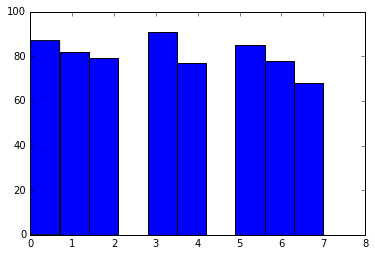

In [28]:
######################################
#                 13                 #
######################################
#data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
#plt.hist(data)

plt.hist(total_days_pass_visited.values())

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

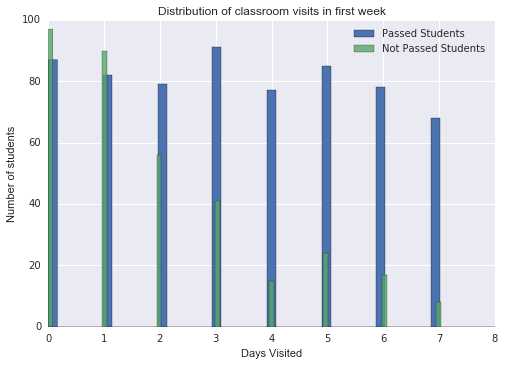

In [55]:
import seaborn as sns
plt.xlabel("Days Visited")
plt.ylabel("Number of students")
plt.title("Distribution of classroom visits in first week")
bins = np.linspace(0, 8, 50)
plt.hist(total_days_pass_visited.values(),bins,label = 'Passed Students')
bins = np.linspace(0, 8, 100)
plt.hist(total_days_non_pass_visited.values(),bins,alpha = 0.8,label = 'Not Passed Students')
plt.legend(loc='upper right')




(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

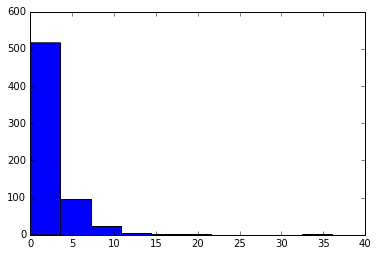

In [61]:
plt.hist(total_lessons_pass_completed.values())

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

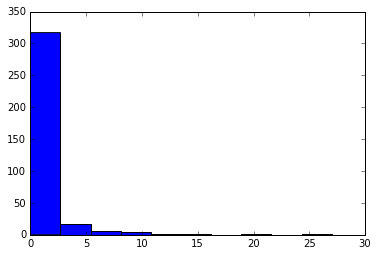

In [62]:
plt.hist(total_lessons_non_pass_completed.values())

(array([ 642.,    0.,    0.,    0.,    0.,    4.,    0.,    0.,    0.,    1.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

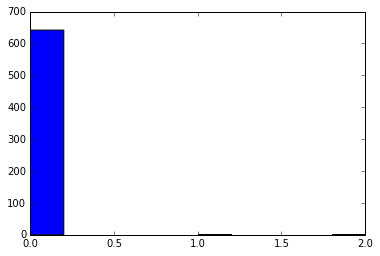

In [63]:
plt.hist(total_projects_pass_completed.values())

(array([   0.,    0.,    0.,    0.,    0.,  348.,    0.,    0.,    0.,    0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

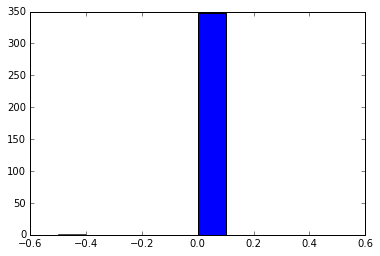

In [64]:
plt.hist(total_projects_non_pass_completed.values())

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

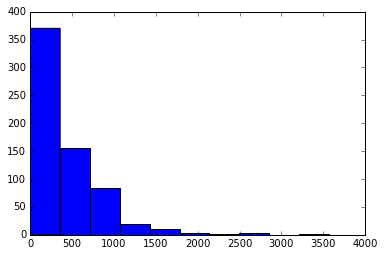

In [65]:
plt.hist(total_passing_minutes.values())

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

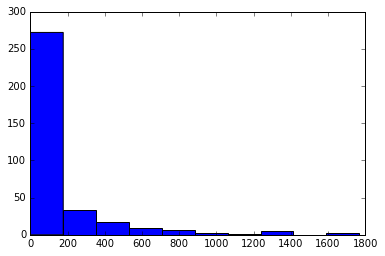

In [66]:
plt.hist(total_non_passing_minutes.values())

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.